In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import matplotlib_fname
%matplotlib inline
from tensorflow import keras

In [13]:
data=np.load('/Users/hare/Downloads/mnist.npz')
X_train, y_train = data["x_train"], data["y_train"]
X_test, y_test = data["x_test"], data["y_test"]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

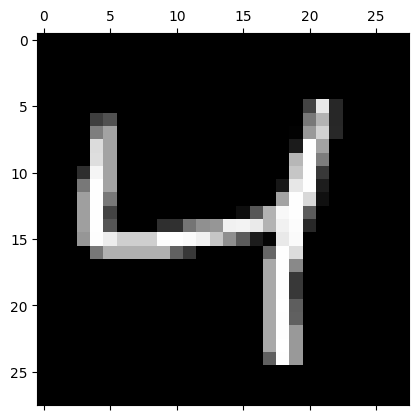

In [18]:
plt.matshow(X_train[2])
plt.gray()

In [19]:
y_train[2]

np.uint8(4)

In [20]:
#from the above 2 line we can clearly see how we have represented the handwritten digits and then from the y_train got the original thing
len(X_train)

60000

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
#through scaling we obtained more accuracy and control over the neural network
X_train=X_train/255
X_test=X_test/255

In [33]:
X_train_flat=X_train.reshape(len(X_train), 28*28)
X_test_flat=X_test.reshape(len(X_test), 28*28)

In [34]:
X_test_flat.shape

(10000, 784)

In [37]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - accuracy: 0.8782 - loss: 0.4635
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - accuracy: 0.9150 - loss: 0.3032
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.9209 - loss: 0.2829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.9239 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.9262 - loss: 0.2663


In [36]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9275 - loss: 0.2662


[0.2662467062473297, 0.9275000095367432]

In [39]:
model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


array([[2.66606491e-02, 3.01552177e-07, 4.43560705e-02, ...,
        9.99833822e-01, 1.03388466e-01, 6.49299860e-01],
       [4.57020849e-01, 5.47292456e-03, 9.99339044e-01, ...,
        6.45033939e-13, 1.63626283e-01, 2.01832528e-09],
       [2.91191449e-04, 9.94418681e-01, 6.30485117e-01, ...,
        1.08439609e-01, 3.35206628e-01, 4.34184745e-02],
       ...,
       [2.35243942e-06, 3.12387056e-06, 9.79437958e-04, ...,
        2.70685673e-01, 5.43304563e-01, 7.47005284e-01],
       [1.27132953e-04, 1.79206399e-04, 1.84835459e-04, ...,
        2.73192545e-05, 7.18805909e-01, 1.37489493e-04],
       [1.28972139e-02, 1.92537639e-10, 2.29231432e-01, ...,
        7.37045580e-09, 2.72315228e-04, 3.36411546e-07]],
      shape=(10000, 10), dtype=float32)

In [47]:
y_predict=model.predict(X_train_flat)
y_predict[2]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step


array([8.1508741e-04, 8.5653861e-05, 1.9888644e-01, 5.4485869e-01,
       9.2373306e-01, 6.5454777e-04, 2.9328626e-03, 6.7770585e-02,
       1.4046664e-02, 5.6098599e-02], dtype=float32)

In [48]:
np.argmax(y_predict[2])

np.int64(4)

In [53]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[np.int64(5), np.int64(0), np.int64(4), np.int64(1), np.int64(9)]

In [56]:
cm=tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5765,    1,   11,    7,   15,   47,   28,    6,   42,    1],
       [   1, 6568,   32,   16,    6,   35,    2,   15,   56,   11],
       [  32,   53, 5407,   74,   81,   37,   43,   77,  142,   12],
       [  25,   32,  135, 5220,    9,  425,   18,   62,  157,   48],
       [  10,   32,   29,    3, 5518,    7,   31,   16,   42,  154],
       [  55,   20,   36,   74,   55, 4959,   55,   14,  122,   31],
       [  35,   19,   52,    0,   61,  109, 5610,    2,   30,    0],
       [  19,   29,   69,   19,   58,    9,    2, 5878,   14,  168],
       [  32,  120,   50,   67,   34,  196,   29,   20, 5253,   50],
       [  29,   25,   21,   57,  198,   62,    2,  163,   50, 5342]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

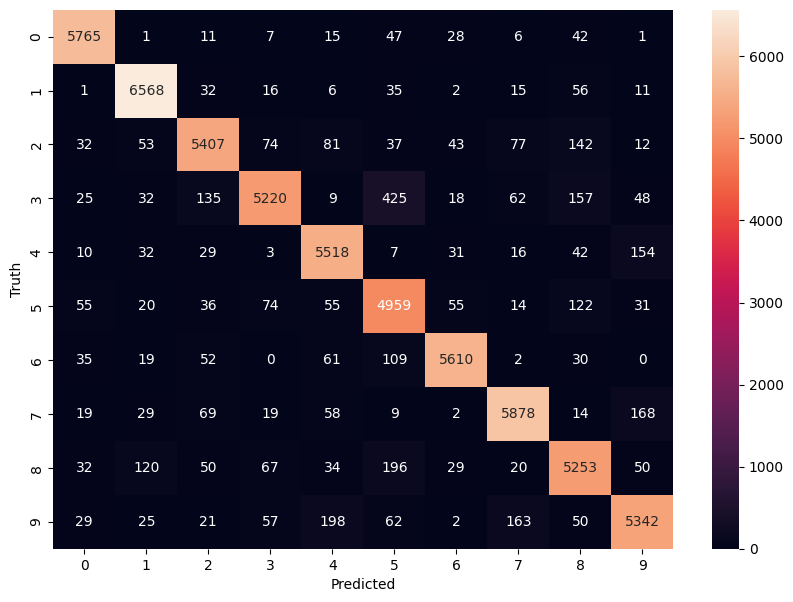

In [57]:
import seaborn as sn
plt. figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d' )
plt. xlabel( 'Predicted')
plt.ylabel ('Truth' )

In [58]:
#now adding hidden layers into it to improve the performance
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9224 - loss: 0.2737
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9643 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9753 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9803 - loss: 0.0653
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9847 - loss: 0.0505


In [59]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.9732 - loss: 0.0881


[0.0881231352686882, 0.9732000231742859]

Text(95.72222222222221, 0.5, 'Truth')

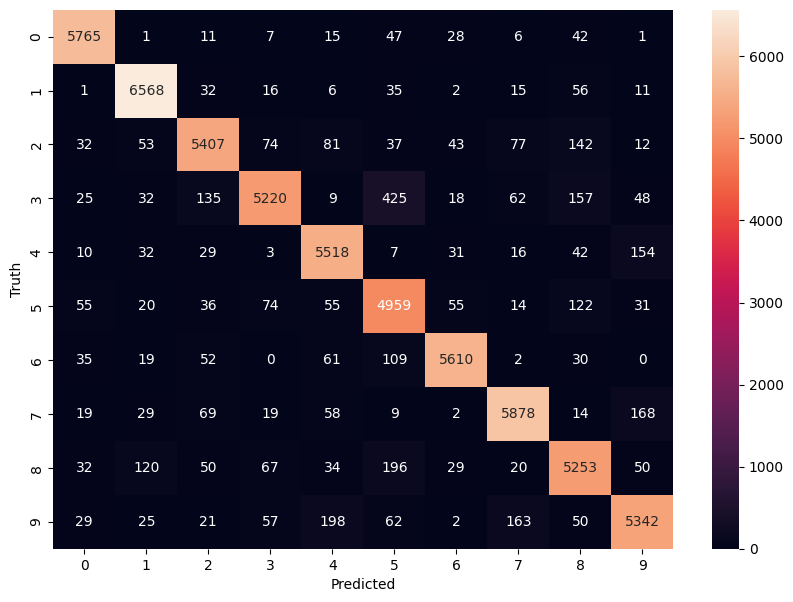

In [61]:
#there is a significant improvement in the evaluation score
import seaborn as sn
plt. figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d' )
plt. xlabel( 'Predicted')
plt.ylabel ('Truth' )